(re_with_feedback)=
```{raw} jupyter
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Stability in Linear Rational Expectations Models

```{index} single: Stability in Linear Rational Expectations Models
```

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture deploys the following libraries:

In [1]:
!pip install quantecon

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import quantecon as qe
from sympy import init_printing, symbols, Matrix
init_printing()

## Overview

This lecture studies stability in the context of an elementary rational expectations model.

We study a rational expectations version of Philip Cagan’s model {cite}`Cagan` linking
the price level to the money supply.

Cagan did not use a rational expectations version of his model, but Sargent {cite}`Sargent77hyper` did.

We study a rational expectations version of this model because it is intrinsically interesting and  because it
has a mathematical structure that
appears in virtually all  linear rational expectations model, namely, that a key  endogenous variable equals
a mathematical expectation of a geometric sum of future values of another variable.

The model determines  the price level or rate of inflation as a function of  the money supply or the rate of change in the money supply.

In this lecture, we'll encounter:

* a convenient formula for the expectation of geometric sum of future values of a variable
* a way of solving an expectational difference equation by mapping it into a vector first-order difference equation and appropriately manipulating an eigen decomposition of the transition matrix in order to impose stability
* a way to use a Big $K$, little $k$ argument to allow apparent feedback from endogenous to exogenous variables within a rational expectations equilibrium
* a use of eigenvector decompositions of matrices that allowed Blanchard and Khan (1981) {cite}`Blanchard_Khan` and Whiteman (1983) {cite}`Whiteman` to solve a class of linear rational expectations models
* how to use **SymPy** to get analytical formulas for some key objects comprising a rational expectations equilibrium

Matrix decompositions employed here are described in more depth in this lecture {doc}`Lagrangian formulations<lagrangian_lqdp>`.

We formulate a version of  Cagan's model under  rational expectations
as an **expectational difference equation** whose solution is a rational expectations equilibrium.

We'll start this lecture with a quick review of deterministic (i.e., non-random)
first-order and second-order linear difference equations.

## Linear Difference Equations

We'll use the *backward shift* or *lag* operator $L$.

The lag operator $L$  maps a sequence $\{x_t\}_{t=0}^\infty$ into the sequence $\{x_{t-1}\}_{t=0}^\infty$

We'll deploy  $L$  by using the equality
$L x_t \equiv x_{t-1}$ in algebraic expressions.

Further,  the inverse $L^{-1}$ of the lag operator is  the *forward shift*
operator.

We'll often use the equality  $L^{-1} x_t \equiv x_{t+1}$ below.

The algebra of lag and forward shift operators can simplify representing and solving linear difference equations.

### First Order

We want to solve a linear first-order scalar difference equation.

Let $|\lambda | < 1$ and let
$\{u_t\}_{t=-\infty}^\infty$ be a bounded sequence of scalar real
numbers.

Let $L$ be the lag operator defined by
$L x_t \equiv x_{t-1}$ and let $L^{-1}$ be the forward shift
operator defined by $L^{-1} x_t \equiv x_{t+1}$.

Then

```{math}
:label: equn_1

(1 - \lambda L) y_t = u_t, \forall t
```

has solutions

```{math}
:label: equn_2

y_t = (1 -\lambda L)^{-1} u_t +k \lambda^t
```

or

$$
y_t =  \sum_{j=0}^\infty \lambda^j u_{t-j} +k \lambda^t
$$

for any real number $k$.

You can verify this fact by applying $(1-\lambda L)$ to both sides
of equation {eq}`equn_2` and noting that $(1 - \lambda L) \lambda^t =0$.

To pin down $k$ we need one condition imposed from outside (e.g.,
an initial or terminal condition) on the path of $y$.

Now let $| \lambda | > 1$.

Rewrite equation {eq}`equn_1` as

```{math}
:label: equn_3

y_{t-1} = \lambda^{-1} y_t - \lambda^{-1} u_t , \forall t
```

or

```{math}
:label: equn_4

(1 - \lambda^{-1} L^{-1}) y_t = - \lambda^{-1} u_{t+1}.
```

A solution is

```{math}
:label: equn_5

y_t = - \lambda^{-1}\left({ 1 \over  1 - \lambda^{-1} L^{-1}} \right)
         u_{t+1} + k \lambda^t
```

for any $k$.

To verify that this is a solution, check the consequences of operating
on both sides of equation {eq}`equn_5` by $(1 -\lambda L)$ and compare to
equation {eq}`equn_1`.

For any bounded $\{u_t\}$ sequence, solution {eq}`equn_2` exists for $|\lambda | < 1$ because
the **distributed lag** in $u$ converges.

Solution {eq}`equn_5` exists when $|\lambda| > 1$ because the **distributed
lead** in $u$ converges.

When $|\lambda | > 1$, the distributed lag in $u$ in {eq}`equn_2` may
diverge, in which case a solution of this form does not exist.

The distributed lead in $u$ in {eq}`equn_5` need not
converge when $|\lambda| < 1$.

### Second Order

Now consider the second order difference equation

```{math}
:label: equn_6

(1-\lambda_1 L) (1 - \lambda_2 L) y_{t+1} = u_t
```

where $\{u_t\}$ is a bounded sequence, $y_0$ is an initial
condition, $| \lambda_1 | < 1$ and $| \lambda_2| >1$.

We seek a bounded sequence $\{y_t\}_{t=0}^\infty$ that satisfies
{eq}`equn_6`. Using insights from our analysis of the first-order equation,
operate on both sides of {eq}`equn_6` by the forward inverse of
$(1-\lambda_2 L)$ to rewrite equation {eq}`equn_6` as

$$
(1-\lambda_1 L) y_{t+1} = -{\frac{\lambda_2^{-1}}{1 - \lambda_2^{-1}L^{-1}}} u_{t+1}
$$

or

```{math}
:label: equn_7

y_{t+1} = \lambda_1 y_t - \lambda_2^{-1} \sum_{j=0}^\infty \lambda_2^{-j} u_{t+j+1} .
```

Thus, we obtained equation {eq}`equn_7` by
solving a stable root (in this case $\lambda_1$) **backward**, and an
unstable root (in this case $\lambda_2$) **forward**.

Equation {eq}`equn_7` has a form that we shall encounter often.

* $\lambda_1 y_t$ is called the **feedback part**
* $-{\frac{\lambda_2^{-1}}{1 - \lambda_2^{-1}L^{-1}}} u_{t+1}$ is called the **feedforward part**

## Illustration: Cagan's Model

Now let's use linear difference equations to represent and solve Sargent's  {cite}`Sargent77hyper` rational expectations version of
Cagan’s model {cite}`Cagan` that connects the price level to the public's anticipations of future money supplies.

Cagan did not use a rational expectations version of his model, but Sargent {cite}`Sargent77hyper`

Let

- $m_t^d$ be the log of the demand for money
- $m_t$ be the log of the supply of money
- $p_t$ be the log of the price level

It follows that $p_{t+1} - p_t$ is the rate of inflation.

The logarithm of the demand for real money balances $m_t^d - p_t$
is an inverse function of the expected rate of inflation
$p_{t+1} - p_t$ for $t \geq 0$:

$$
m_t^d - p_t = - \beta (p_{t+1} - p_t ), \quad \beta >0
$$

Equate the demand for log money $m_t^d$ to the supply of log money
$m_t$ in the above equation and rearrange to deduce that the
logarithm of the price level $p_t$ is related to the logarithm of
the money supply $m_t$ by

```{math}
:label: equation_1

p_t = (1 -\lambda) m_t + \lambda p_{t+1}
```

where $\lambda \equiv \frac{\beta}{1+\beta} \in (0,1)$.

(We note that the characteristic polynomial if $1 - \lambda^{-1} z^{-1} = 0$ so that the zero of the
characteristic polynomial in this case is $\lambda \in (0,1)$ which here is **inside** the unit circle.)

Solving the first order difference equation {eq}`equation_1` forward gives

```{math}
:label: equation_2

p_t = (1 - \lambda) \sum_{j=0}^\infty \lambda^j m_{t+j},
```

which is the unique **stable** solution of difference equation {eq}`equation_1` among
a class of more general solutions

```{math}
:label: equation_1a

p_t = (1 - \lambda) \sum_{j=0}^\infty \lambda^j m_{t+j} + c \lambda^{-t}
```

that is indexed by the real number $c \in {\bf R}$.

Because we want to focus on stable solutions, we set $c=0$.

Equation {eq}`equation_1a` attributes  **perfect foresight** about the money supply sequence to the holders of real balances.

We begin by assuming that the log of the money supply is **exogenous**
in the sense that it is an autonomous process that does not feed back on
the log of the price level.

In particular, we assume that the log of the money supply is described
by the linear state space system

```{math}
:label: equation_3

\begin{aligned}
  m_t &  = G x_t \\ x_{t+1} & = A x_t
 \end{aligned}
```

where $x_t$ is an $n \times 1$ vector that does not include
$p_t$ or lags of $p_t$, $A$ is an $n \times n$
matrix with eigenvalues that are less than $\lambda^{-1}$ in
absolute values, and $G$ is a $1 \times n$ selector matrix.

Variables appearing in the vector $x_t$ contain information that
might help predict future values of the money supply.

We’ll start with an example in which $x_t$ includes only $m_t$,
possibly lagged values of $m$, and a constant.

An example of such an $\{m_t\}$ process that fits info state space
system {eq}`equation_3` is one that satisfies the second order linear difference
equation

$$
m_{t+1} = \alpha + \rho_1 m_t + \rho_2 m_{t-1}
$$

where the zeros of the characteristic polynomial
$(1 - \rho_1 z - \rho_2 z^2)$ are strictly greater than $1$
in modulus.

(Please see  {doc}`this <samuelson>` QuantEcon lecture for more about characteristic polynomials and their role in solving linear difference equations.)

We seek a stable or non-explosive solution of the difference equation {eq}`equation_1` that
obeys the system comprised of {eq}`equation_1`-{eq}`equation_3`.

By stable or non-explosive, we mean that neither $m_t$ nor $p_t$
diverges as $t \rightarrow + \infty$.

This requires  that we  shut down the term $c \lambda^{-t}$ in equation {eq}`equation_1a` above by setting $c=0$

The solution we are after is

```{math}
:label: equation_4

p_t = F x_t
```

where

```{math}
:label: equation_5

F = (1-\lambda) G (I - \lambda A)^{-1}
```

```{note}
As mentioned above, an *explosive solution* of difference
equation {eq}`equation_1` can be constructed by adding to the right hand of {eq}`equation_4` a
sequence $c \lambda^{-t}$ where $c$ is an arbitrary positive
constant.
```

## Some Python Code

We’ll construct examples that illustrate {eq}`equation_3`.

Our first example takes as the law of motion for the log money supply
the second order difference equation

```{math}
:label: equation_6

m_{t+1} = \alpha + \rho_1 m_t + \rho_2 m_{t-1}
```

that is parameterized by $\rho_1, \rho_2, \alpha$

To capture this parameterization with system {eq}`equation_2` we set

$$
x_t = \begin{bmatrix} 1 \cr m_t \cr m_{t-1} \end{bmatrix} , \quad
  A= \begin{bmatrix} 1 & 0 & 0 \cr
                     \alpha & \rho_1 & \rho_2 \cr
                      0 & 1 & 0 \end{bmatrix} , \quad
  G = \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}
$$

Here is Python code

In [3]:
λ = .9

α = 0
ρ1 = .9
ρ2 = .05

A = np.array([[1,  0,  0],
              [α, ρ1, ρ2],
              [0,  1,  0]])
G = np.array([[0, 1, 0]])

The matrix $A$ has one eigenvalue equal to unity.

It is associated with the $A_{11}$ component that captures a
constant component of the state $x_t$.

We can verify that the two eigenvalues of $A$ not associated with
the constant in the state $x_t$ are strictly less than unity in
modulus.

In [4]:
eigvals = np.linalg.eigvals(A)
print(eigvals)

[-0.05249378  0.95249378  1.        ]


In [5]:
(abs(eigvals) <= 1).all()

True

Now let’s compute $F$ in formulas {eq}`equation_4` and {eq}`equation_5`.

In [6]:
# compute the solution, i.e. forumula (3)
F = (1 - λ) * G @ np.linalg.inv(np.eye(A.shape[0]) - λ * A)
print("F= ",F)

F=  [[0.         0.66889632 0.03010033]]


Now let’s simulate paths of $m_t$ and $p_t$ starting from an
initial value $x_0$.

In [7]:
# set the initial state
x0 = np.array([1, 1, 0])

T = 100 # length of simulation

m_seq = np.empty(T+1)
p_seq = np.empty(T+1)

[m_seq[0]] = G @ x0
[p_seq[0]] = F @ x0

# simulate for T periods
x_old = x0
for t in range(T):

    x = A @ x_old

    [m_seq[t+1]] = G @ x
    [p_seq[t+1]] = F @ x

    x_old = x

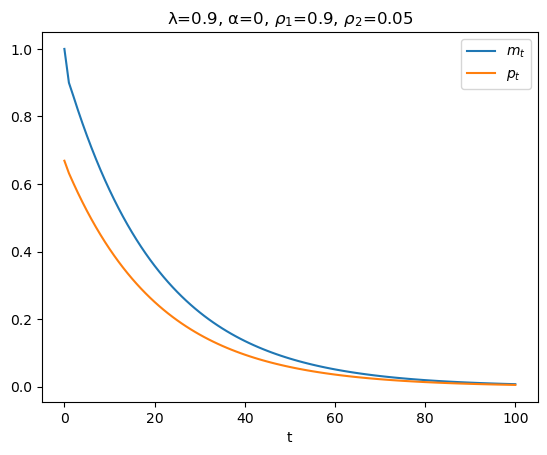

In [8]:
plt.figure()
plt.plot(range(T+1), m_seq, label=r'$m_t$')
plt.plot(range(T+1), p_seq, label=r'$p_t$')
plt.xlabel('t')
plt.title(rf'λ={λ}, α={α}, $ρ_1$={ρ1}, $ρ_2$={ρ2}')
plt.legend()
plt.show()

In the above graph, why is the log of the price level always less than
the log of the money supply?

Because

- according to equation {eq}`equation_2`, $p_t$ is a geometric weighted
  average of current and future values of $m_t$, and
- it happens that in this example future $m$’s are always less
  than the current $m$

## Alternative Code

We could also have run the simulation using the quantecon
**LinearStateSpace** code.

The following code block performs the calculation with that code.

In [9]:
# construct a LinearStateSpace instance

# stack G and F
G_ext = np.vstack([G, F])

C = np.zeros((A.shape[0], 1))

ss = qe.LinearStateSpace(A, C, G_ext, mu_0=x0)

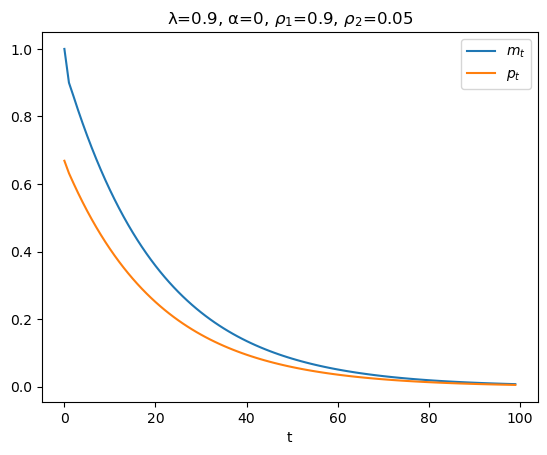

In [10]:
T = 100

# simulate using LinearStateSpace
x, y = ss.simulate(ts_length=T)

# plot
plt.figure()
plt.plot(range(T), y[0,:], label='$m_t$')
plt.plot(range(T), y[1,:], label='$p_t$')
plt.xlabel('t')
plt.title(f'λ={λ}, α={α}, $ρ_1$={ρ1}, $ρ_2$={ρ2}')
plt.legend()
plt.show()

### Special Case

To simplify our presentation in ways that will let focus on an important
idea, in the above second-order difference equation {eq}`equation_6` that governs
$m_t$, we now set $\alpha =0$,
$\rho_1 = \rho \in (-1,1)$, and $\rho_2 =0$ so that the law
of motion for $m_t$ becomes

```{math}
:label: equation_7

m_{t+1} =\rho m_t
```

and the state $x_t$ becomes

$$
x_t = m_t .
$$

Consequently,  we can set $G =1, A =\rho$ making our formula {eq}`equation_5` for $F$
become

$$
F = (1-\lambda) (1 -\lambda \rho)^{-1} .
$$

so that the log the log price level satisfies

$$
p_t = F m_t .
$$

Please keep these formulas in mind as we investigate an alternative
route to and interpretation of our formula for $F$.

## Another Perspective

Above, we imposed stability or non-explosiveness on the solution of the key difference equation {eq}`equation_1`
in Cagan's model by solving the  unstable root of the characteristic polynomial forward.

To shed light on the mechanics involved in imposing stability on a
solution of a potentially unstable system of linear difference equations
and to prepare the way for generalizations of our model in which the
money supply is allowed to feed back on the price level itself, we stack
equations {eq}`equation_1` and {eq}`equation_7` to form the system

```{math}
:label: equation_8

\begin{bmatrix} m_{t+1} \cr p_{t+1} \end{bmatrix} = \begin{bmatrix} \rho & 0 \\ - (1-\lambda)/\lambda & \lambda^{-1}  \end{bmatrix} \begin{bmatrix} m_t \\ p_t \end{bmatrix}
```

or

```{math}
:label: equation_9

y_{t+1} = H y_t, \quad t \geq 0
```

where

```{math}
:label: equation_10

H = \begin{bmatrix} \rho & 0 \\ - (1-\lambda)/\lambda & \lambda^{-1}  \end{bmatrix} .
```

Transition matrix $H$ has eigenvalues $\rho \in (0,1)$ and
$\lambda^{-1} > 1$.

Because an eigenvalue of $H$ exceeds unity, if we iterate on
equation {eq}`equation_9` starting from an arbitrary initial vector
$y_0 = \begin{bmatrix} m_0 \\ p_0 \end{bmatrix}$ with $m_0 >0, p_0 >0$, we discover that
in general absolute values of both components of $y_t$ diverge
toward $+\infty$ as $t \rightarrow + \infty$.

To substantiate this claim, we can use the eigenvector matrix
decomposition of $H$ that is available to us because the
eigenvalues of $H$ are distinct

$$
H = Q \Lambda Q^{-1} .
$$

Here $\Lambda$ is a diagonal matrix of eigenvalues of $H$
and $Q$ is a matrix whose columns are eigenvectors associated with the
corresponding eigenvalues.

Note that

$$
H^t = Q \Lambda^t Q^{-1}
$$

so that

$$
y_t = Q \Lambda^t Q^{-1} y_0
$$

For almost all initial vectors $y_0$, the presence of the
eigenvalue $\lambda^{-1} > 1$ causes both components of
$y_t$ to diverge in absolute value to $+\infty$.

To explore this outcome in more detail, we can use the following
transformation

$$
y^*_t = Q^{-1} y_t
$$

that allows us to represent the dynamics in a way that isolates the
source of the propensity of paths to diverge:

$$
y^*_{t+1} = \Lambda^t y^*_t
$$

Staring at this equation indicates that unless

```{math}
:label: equation_11

y^*_0 = \begin{bmatrix} y^*_{1,0} \cr 0 \end{bmatrix}
```

the path of $y^*_t$ and therefore the paths of both components of
$y_t = Q y^*_t$ will diverge in absolute value as
$t \rightarrow +\infty$. (We say that the paths *explode*)

Equation {eq}`equation_11` also leads us to conclude that there is a unique setting
for the initial vector $y_0$ for which both components of
$y_t$ do not diverge.

The required setting of $y_0$ must evidently have the property
that

$$
Q y_0 =  y^*_0 = \begin{bmatrix} y^*_{1,0} \cr 0 \end{bmatrix} .
$$

But note that since
$y_0 = \begin{bmatrix} m_0 \cr p_0 \end{bmatrix}$ and $m_0$
is given to us an initial condition,  $p_0$ has to do all the adjusting to satisfy this equation.

Sometimes this situation is described by saying that while $m_0$
is truly a **state** variable, $p_0$ is a **jump** variable that
must adjust at $t=0$ in order to satisfy the equation.

Thus, in a nutshell the unique value of the vector $y_0$ for which
the paths of $y_t$ do not diverge must have second component
$p_0$ that verifies equality {eq}`equation_11` by setting the second component
of $y^*_0$ equal to zero.

The component $p_0$ of the initial vector
$y_0 = \begin{bmatrix} m_0 \cr p_0 \end{bmatrix}$ must evidently
satisfy

$$
Q^{\{2\}} y_0 =0
$$

where $Q^{\{2\}}$ denotes the second row of $Q^{-1}$, a
restriction that is equivalent to

```{math}
:label: equation_12

Q^{21} m_0 + Q^{22} p_0 = 0
```

where $Q^{ij}$ denotes the $(i,j)$ component of
$Q^{-1}$.

Solving this equation for $p_0$, we find

```{math}
:label: equation_13

p_0 = - (Q^{22})^{-1} Q^{21} m_0.
```

This is the unique **stabilizing value** of $p_0$ expressed as a function of
$m_0$.

### Refining the Formula

We can get an even more convenient formula for $p_0$ that is cast
in terms of components of $Q$ instead of components of
$Q^{-1}$.

To get this formula, first note that because $(Q^{21}\ Q^{22})$ is
the second row of the inverse of $Q$ and because
$Q^{-1} Q = I$, it follows that

$$
\begin{bmatrix} Q^{21} & Q^{22} \end{bmatrix}  \begin{bmatrix} Q_{11}\cr Q_{21} \end{bmatrix} = 0
$$

which implies that

$$
Q^{21} Q_{11} + Q^{22} Q_{21} = 0.
$$

Therefore,

$$
-(Q^{22})^{-1} Q^{21} = Q_{21} Q^{-1}_{11}.
$$

So we can write

```{math}
:label: equation_14

p_0 = Q_{21} Q_{11}^{-1} m_0 .
```

It can be verified that this formula replicates itself over time in the sense  that

```{math}
:label: equation_15

p_t = Q_{21} Q^{-1}_{11} m_t.
```

To implement formula {eq}`equation_15`, we want to compute $Q_1$ the
eigenvector of $Q$ associated with the stable eigenvalue
$\rho$ of $Q$.

By hand it can be verified that the eigenvector associated with the
stable eigenvalue $\rho$ is proportional to

$$
Q_1  = \begin{bmatrix} 1-\lambda  \rho \\ 1 - \lambda   \end{bmatrix}.
$$

Notice that if we set $A=\rho$ and $G=1$ in our earlier
formula for $p_t$ we get

$$
p_t = G (I - \lambda A)^{-1} m_t =  (1-\lambda) (1 - \lambda \rho)^{-1} m_t ,
$$

a formula that is equivalent with

$$
p_t = Q_{21} Q_{11}^{-1}  m_t ,
$$

where

$$
Q_1 = \begin{bmatrix} Q_{11} \\ Q_{21}  \end{bmatrix}.
$$

### Remarks about Feedback

We have expressed {eq}`equation_8` in what superficially appears to be a form in
which $y_{t+1}$ feeds back on $y_t$, even though what we
actually want to represent is that the component $p_t$ feeds
**forward** on $p_{t+1}$, and through it, on future
$m_{t+j}$, $j = 0, 1, 2, \ldots$.

A tell-tale sign that we should look beyond its superficial “feedback”
form is that $\lambda^{-1} > 1$ so that the matrix $H$ in
{eq}`equation_8` is **unstable**

- it has one eigenvalue $\rho$ that is less than one in modulus
  that does not imperil stability, but $\ldots$
- it has a second eigenvalue $\lambda^{-1}$ that exceeds one in
  modulus and that makes $H$ an unstable matrix

We’ll keep these observations in mind as we turn now to a case in which
the log money supply actually does feed back on the log of the price
level.

## Log money Supply Feeds Back on Log Price Level

An arrangement of eigenvalues that split around unity, with one being
below unity and another being greater than unity, sometimes prevails when there is  *feedback* from the log price level to the log
money supply.

Let the feedback rule be

```{math}
:label: equation_16

m_{t+1} =  \rho m_t + \delta p_t
```

where $\rho \in (0,1)$  and where we shall now allow
$\delta \neq 0$.

**Warning:**  If things are to fit together as we
wish to deliver a stable system for some initial value $p_0$ that we want to determine uniquely, $\delta$ cannot be too large.

The forward-looking equation {eq}`equation_1` continues to describe equality between
the demand and supply of money.

We assume that equations {eq}`equation_1` and {eq}`equation_16` govern
$y_t \equiv \begin{bmatrix} m_t \cr p_t \end{bmatrix}$ for
$t \geq 0$.

The transition matrix $H$ in the law of motion

$$
y_{t+1} = H y_t
$$

now becomes

$$
H = \begin{bmatrix} \rho & \delta \\ - (1-\lambda)/\lambda & \lambda^{-1}  \end{bmatrix} .
$$

We take $m_0$ as a given initial condition and as before seek an
initial value $p_0$ that stabilizes the system in the sense that
$y_t$ converges as $t \rightarrow + \infty$.

Our approach is identical with the one  followed above and is based on an
eigenvalue decomposition in which, cross our fingers, one eigenvalue
exceeds unity and the other is less than unity in absolute value.

When $\delta \neq 0$ as we now assume, the eigenvalues of
$H$ will no longer be $\rho \in (0,1)$ and
$\lambda^{-1} > 1$

We’ll just calculate them and apply the same algorithm that we used
above.

That algorithm remains valid so long as the eigenvalues split around
unity as before.

Again we assume that $m_0$ is  an initial condition, but that
$p_0$ is not given but to be solved for.

Let’s write and execute some Python code that will let us explore how outcomes depend on
$\delta$.

In [11]:
def construct_H(ρ, λ, δ):
    "contruct matrix H given parameters."

    H = np.empty((2, 2))
    H[0, :] = ρ,δ
    H[1, :] = - (1 - λ) / λ, 1 / λ

    return H

def H_eigvals(ρ=.9, λ=.5, δ=0):
    "compute the eigenvalues of matrix H given parameters."

    # construct H matrix
    H = construct_H(ρ, λ, δ)

    # compute eigenvalues
    eigvals = np.linalg.eigvals(H)

    return eigvals

In [12]:
H_eigvals()

array([2. , 0.9])

Notice that a negative $\delta$ will not imperil the stability of the matrix
$H$, even if it has a big absolute value.

In [13]:
# small negative δ
H_eigvals(δ=-0.05)

array([0.8562829, 2.0437171])

In [14]:
# large negative δ
H_eigvals(δ=-1.5)

array([0.10742784, 2.79257216])

A sufficiently small positive $\delta$ also causes no problem.

In [15]:
# sufficiently small positive δ
H_eigvals(δ=0.05)

array([0.94750622, 1.95249378])

But a large enough positive $\delta$ makes both eigenvalues of $H$
strictly greater than unity in modulus.

For example,

In [16]:
H_eigvals(δ=0.2)

array([1.12984379, 1.77015621])

We want to study systems in which one eigenvalue exceeds unity in
modulus while the other is less than unity in modulus, so we avoid
values of $\delta$ that are too.

That is, we want to avoid too much positive feedback from $p_t$ to $m_{t+1}$.

In [17]:
def magic_p0(m0, ρ=.9, λ=.5, δ=0):
    """
    Use the magic formula (8) to compute the level of p0
    that makes the system stable.
    """

    H = construct_H(ρ, λ, δ)
    eigvals, Q = np.linalg.eig(H)

    # find the index of the smaller eigenvalue
    ind = 0 if eigvals[0] < eigvals[1] else 1

    # verify that the eigenvalue is less than unity
    if eigvals[ind] > 1:

        print("both eigenvalues exceed unity in modulus")

        return None

    p0 = Q[1, ind] / Q[0, ind] * m0

    return p0

Let's plot how the solution $p_0$ changes as $m_0$
changes for different settings of $\delta$.

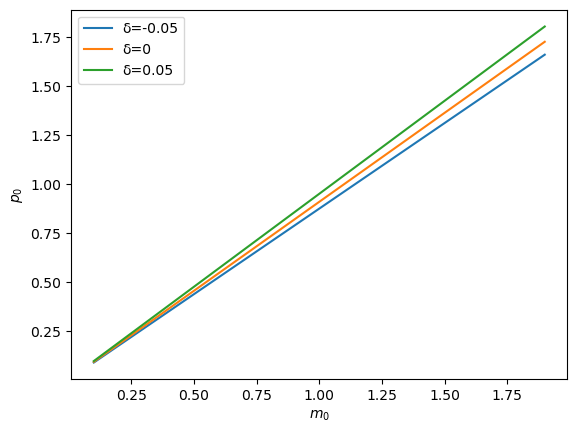

In [18]:
m_range = np.arange(0.1, 2., 0.1)

for δ in [-0.05, 0, 0.05]:
    plt.plot(m_range, [magic_p0(m0, δ=δ) for m0 in m_range], label=f"δ={δ}")
plt.legend()

plt.xlabel(r"$m_0$")
plt.ylabel(r"$p_0$")
plt.show()

To look at things from a different angle, we can fix the initial value $m_0$ and
see how $p_0$ changes as $\delta$ changes.

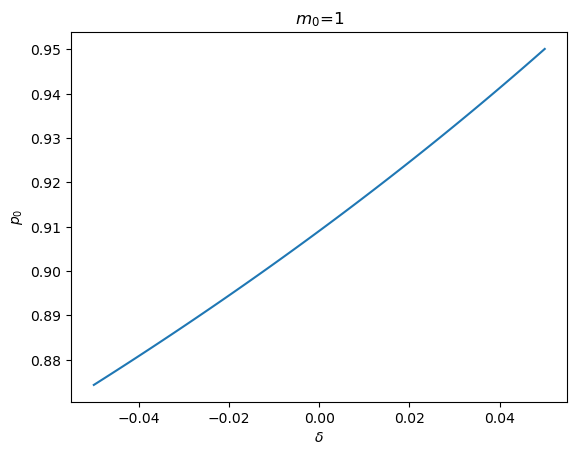

In [19]:
m0 = 1

δ_range = np.linspace(-0.05, 0.05, 100)
plt.plot(δ_range, [magic_p0(m0, δ=δ) for δ in δ_range])
plt.xlabel(r'$\delta$')
plt.ylabel(r'$p_0$')
plt.title(rf'$m_0$={m0}')
plt.show()

Notice that when $\delta$ is large enough, both eigenvalues exceed
unity in modulus, causing a stabilizing value of $p_0$ not to
exist.

In [20]:
magic_p0(1, δ=0.2)

both eigenvalues exceed unity in modulus


## Big $P$, Little $p$ Interpretation

It is helpful to view our solutions of difference equations having  feedback from the price level or inflation to money or the rate of money
creation in terms of the Big $K$, little $k$ idea discussed in {doc}`Rational Expectations Models <rational_expectations>`.

This will help us sort out what is taken as given by the decision makers who use the
difference equation {eq}`equation_2` to determine $p_t$ as a function of their forecasts of future values of
$m_t$.

Let's write the stabilizing solution that we have computed using the eigenvector decomposition of $H$ as
$P_t = F^* m_t$, where

$$
F^* = Q_{21} Q_{11}^{-1} .
$$

Then from $P_{t+1} = F^* m_{t+1}$ and $m_{t+1} = \rho m_t + \delta P_t$ we can deduce the recursion $P_{t+1} = F^* \rho m_t + F^* \delta P_t$ and create the stacked system

$$
\begin{bmatrix} m_{t+1} \cr P_{t+1} \end{bmatrix}  =    \begin{bmatrix} \rho & \delta \cr
                F^* \rho & F^* \delta   \end{bmatrix} \begin{bmatrix} m_t \cr P_t \end{bmatrix}
$$

or

$$
x_{t+1} = A x_t
$$

where $x_t = \begin{bmatrix} m_t \cr P_t \end{bmatrix}$.

Apply formula {eq}`equation_5` for $F$ to deduce that

$$
p_t = F \begin{bmatrix} m_t \cr P_t \end{bmatrix} = F \begin{bmatrix} m_t \cr F^* m_t \end{bmatrix}
$$

which implies that

$$
p_t = \begin{bmatrix} F_1 & F_2 \end{bmatrix}    \begin{bmatrix} m_t \cr F^* m_t \end{bmatrix} = F_1 m_t + F_2 F^* m_t
$$

so that we can anticipate that

$$
F^* = F_1 + F_2 F^*
$$

We shall verify this equality in the next block of Python code that implements the following
computations.

1. For the system with $\delta\neq 0$ so that there is feedback,
   we compute the stabilizing solution for $p_t$ in the form
   $p_t = F^* m_t$ where $F^* = Q_{21}Q_{11}^{-1}$ as above.
1. Recalling the system {eq}`equation_3`, {eq}`equation_4`, and {eq}`equation_5` above, we define
   $x_t = \begin{bmatrix} m_t \cr P_t \end{bmatrix}$ and notice
   that it is Big $P_t$ and not little $p_t$ here. Then we form $A$ and $G$ as
   $A = \begin{bmatrix}\rho & \delta \cr F^* \rho & F^*\delta \end{bmatrix}$
   and $G = \begin{bmatrix} 1 & 0 \end{bmatrix}$ and we compute
   $\begin{bmatrix}  F_1 &  F_2 \end{bmatrix} \equiv F$
   from equation {eq}`equation_5` above.
1. We compute $F_1 +  F_2 F^*$ and compare it
   with $F^*$ and check for the anticipated  equality.

In [21]:
# set parameters
ρ = .9
λ = .5
δ = .05

In [22]:
# solve for F_star
H = construct_H(ρ, λ, δ)
eigvals, Q = np.linalg.eig(H)

ind = 0 if eigvals[0] < eigvals[1] else 1
F_star = Q[1, ind] / Q[0, ind]
F_star

In [23]:
# solve for F_check
A = np.empty((2, 2))
A[0, :] = ρ, δ
A[1, :] = F_star * A[0, :]

G = np.array([1, 0])

F_check= (1 - λ) * G @ np.linalg.inv(np.eye(2) - λ * A)
F_check

array([0.92755597, 0.02375311])

Compare $F^*$ with $F_1 + F_2 F^*$

In [24]:
F_check[0] + F_check[1] * F_star, F_star

## Fun with SymPy

This section is a  gift for readers who have made it this far.

It puts SymPy to work on our model.

Thus, we  use Sympy to compute some  key objects comprising the eigenvector decomposition of $H$.

We start by generating an $H$ with nonzero $\delta$.

In [25]:
λ, δ, ρ = symbols('λ, δ, ρ')

In [26]:
H1 = Matrix([[ρ,δ], [- (1 - λ) / λ, λ ** -1]])

In [27]:
H1

⎡  ρ    δ⎤
⎢        ⎥
⎢λ - 1  1⎥
⎢─────  ─⎥
⎣  λ    λ⎦

In [28]:
H1.eigenvals()

In [29]:
H1.eigenvects()

⎡⎛                                                      ⎡⎡  ⎛             ____ ↪
⎢⎜             ____________________________________     ⎢⎢  ⎜            ╱     ↪
⎢⎜            ╱      2            2  2                  ⎢⎢  ⎜λ⋅ρ + 1   ╲╱  4⋅δ ↪
⎢⎜λ⋅ρ + 1   ╲╱  4⋅δ⋅λ  - 4⋅δ⋅λ + λ ⋅ρ  - 2⋅λ⋅ρ + 1      ⎢⎢λ⋅⎜─────── - ─────── ↪
⎢⎜─────── - ───────────────────────────────────────, 1, ⎢⎢  ⎝  2⋅λ             ↪
⎢⎜  2⋅λ                       2⋅λ                       ⎢⎢──────────────────── ↪
⎢⎜                                                      ⎢⎢                     ↪
⎢⎜                                                      ⎢⎢                     ↪
⎣⎝                                                      ⎣⎣                     ↪

↪ ________________________________⎞        ⎤⎤⎞  ⎛                              ↪
↪   2            2  2             ⎟        ⎥⎥⎟  ⎜             ________________ ↪
↪ ⋅λ  - 4⋅δ⋅λ + λ ⋅ρ  - 2⋅λ⋅ρ + 1 ⎟        ⎥⎥⎟  ⎜            ╱      2          ↪
↪ ─────────────────────────

Now let's compute $H$ when  $\delta$ is zero.

In [30]:
H2 = Matrix([[ρ,0], [- (1 - λ) / λ, λ ** -1]])

In [31]:
H2

⎡  ρ    0⎤
⎢        ⎥
⎢λ - 1  1⎥
⎢─────  ─⎥
⎣  λ    λ⎦

In [32]:
H2.eigenvals()

In [33]:
H2.eigenvects()

⎡               ⎛      ⎡⎡λ⋅ρ - 1⎤⎤⎞⎤
⎢⎛1     ⎡⎡0⎤⎤⎞  ⎜      ⎢⎢───────⎥⎥⎟⎥
⎢⎜─, 1, ⎢⎢ ⎥⎥⎟, ⎜ρ, 1, ⎢⎢ λ - 1 ⎥⎥⎟⎥
⎢⎝λ     ⎣⎣1⎦⎦⎠  ⎜      ⎢⎢       ⎥⎥⎟⎥
⎣               ⎝      ⎣⎣   1   ⎦⎦⎠⎦

Below we do induce SymPy to do the following fun things for us analytically:

1. We compute the matrix $Q$ whose first column is
   the eigenvector associated with $\rho$. and whose second column
   is the eigenvector associated with $\lambda^{-1}$.
1. We use SymPy to compute the inverse $Q^{-1}$ of $Q$
   (both in symbols).
1. We use SymPy to compute $Q_{21} Q_{11}^{-1}$ (in symbols).
1. Where $Q^{ij}$ denotes the $(i,j)$ component of
   $Q^{-1}$, we use SymPy to compute
   $- (Q^{22})^{-1} Q^{21}$ (again in symbols)

In [34]:
# construct Q
vec = []
for i, (eigval, _, eigvec) in enumerate(H2.eigenvects()):

    vec.append(eigvec[0])

    if eigval == ρ:
        ind = i

Q = vec[ind].col_insert(1, vec[1-ind])

In [35]:
Q

⎡λ⋅ρ - 1   ⎤
⎢───────  0⎥
⎢ λ - 1    ⎥
⎢          ⎥
⎣   1     1⎦

$Q^{-1}$

In [36]:
Q_inv = Q ** (-1)
Q_inv

⎡ λ - 1    ⎤
⎢───────  0⎥
⎢λ⋅ρ - 1   ⎥
⎢          ⎥
⎢ 1 - λ    ⎥
⎢───────  1⎥
⎣λ⋅ρ - 1   ⎦

$Q_{21}Q_{11}^{-1}$

In [37]:
Q[1, 0] / Q[0, 0]

$−(Q^{22})^{−1}Q^{21}$

In [38]:
- Q_inv[1, 0] / Q_inv[1, 1]